In [2]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.pipeline import Pipeline

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

enc = KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="quantile")
Y_train_binned = enc.fit_transform(Y_train)
Y_test_binned = enc.fit_transform(Y_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, Y_train_binned.shape, Y_test_binned.shape

((2344, 136), (586, 136), (2344, 1), (586, 1), (2344, 1), (586, 1))

# Linear SVM

In [3]:
from sklearn.preprocessing import StandardScaler

LSVM = LinearSVC(C=10000)
LSVM.fit(X_train, Y_train_binned.ravel())

y_pred_train = LSVM.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = LSVM.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.199
Accuracy: 0.157


C:\Users\david\py_venvs\progetto_DWM_venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
# scalo i dati
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", LinearSVC(max_iter=10000))
])
svm_reg.fit(X_train, Y_train_binned.ravel())

y_pred_train = svm_reg.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = svm_reg.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.449
Accuracy: 0.205


C:\Users\david\py_venvs\progetto_DWM_venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


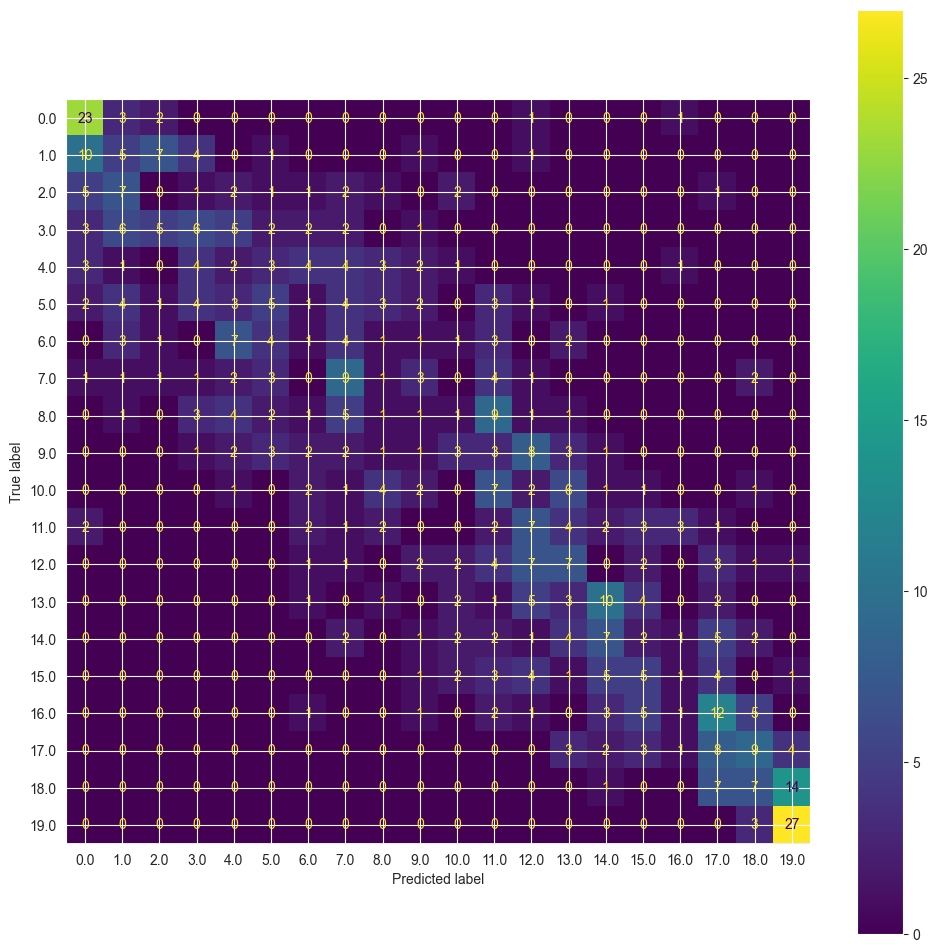

In [5]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=svm_reg,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

# SVM

In [6]:
SVM = SVC(C=100000)
SVM.fit(X_train, Y_train_binned.ravel())
y_pred = SVM.predict(X_test)

y_pred_train = SVM.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = SVM.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.640
Accuracy: 0.280


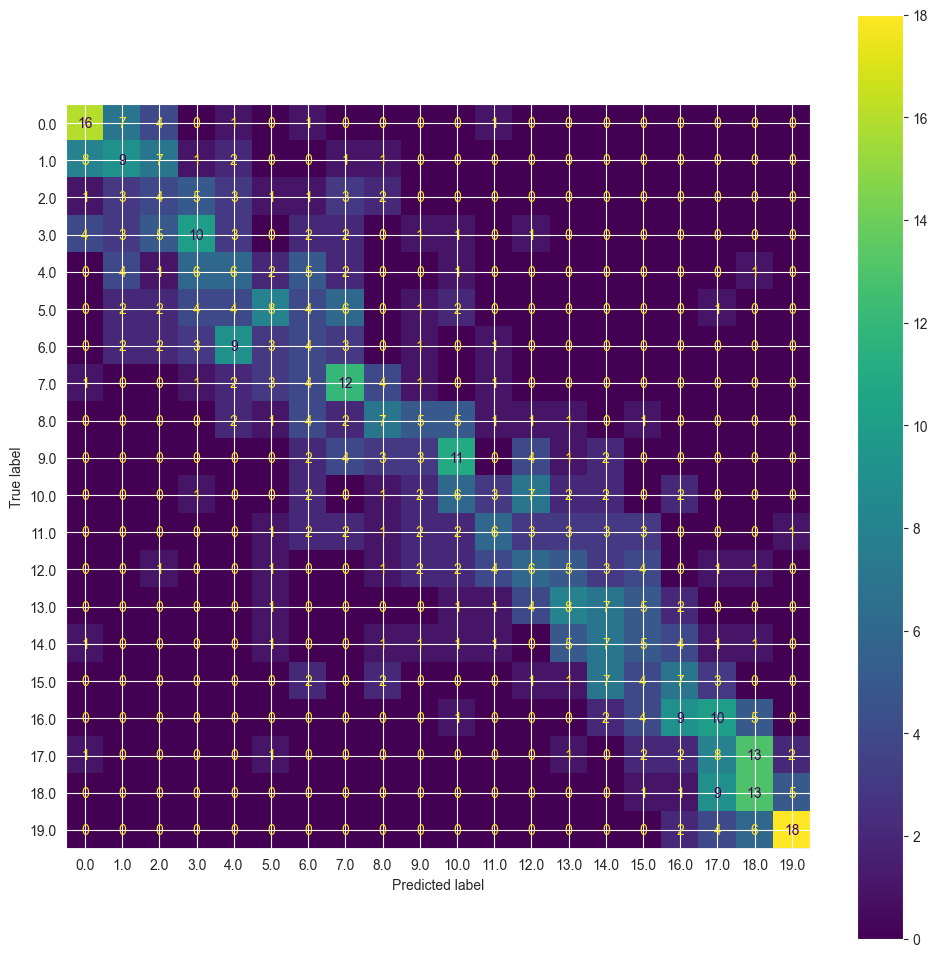

In [7]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=SVM,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

In [8]:
# scalo i dati
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVC(C=1000))
])
svm_reg.fit(X_train, Y_train_binned.ravel())

y_pred_train = svm_reg.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = svm_reg.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 1.000
Accuracy: 0.312


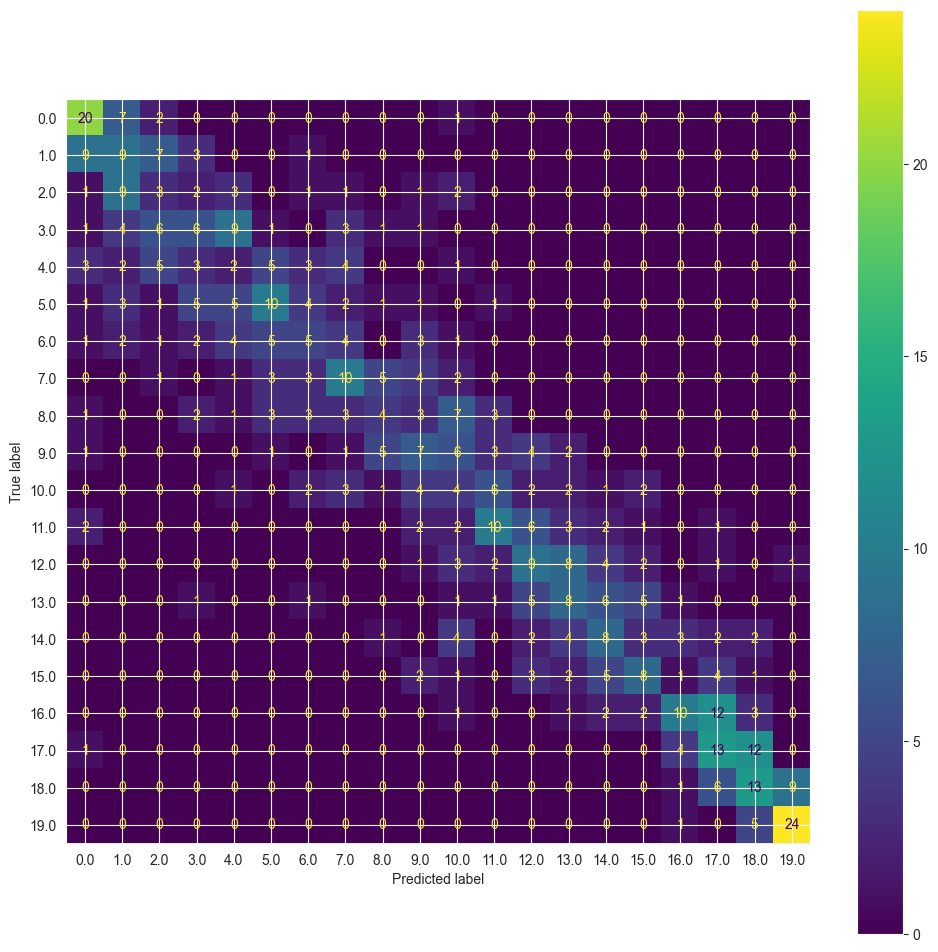

In [9]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=svm_reg,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

# Regressione

In [10]:
col = ['Overall_Qual', 'Gr_Liv_Area', 'Garage_Cars', 'Total_Bsmt_SF', 'Full_Bath', 'Kitchen_Qual',
       'Year_Built', 'Exter_Qual']

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVR(C=100000))
])
svm_reg.fit(X_train[col], Y_train)

y_pred_train = svm_reg.predict(X_train[col])
print ("Train Error: {:.4f}".format( mean_squared_error(y_true = Y_train,
                                                        y_pred = y_pred_train)) )

y_pred_test = svm_reg.predict(X_test[col])
print ("Test Error : {:.4f}".format( mean_squared_error(y_true = Y_test,
                                                        y_pred = y_pred_test)) )

C:\Users\david\py_venvs\progetto_DWM_venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Error: 614422132.3234
Test Error : 875732961.6233
